---
## **health insurance charge analysis and prediction** 
---

### **Objectives of this Analysis**
* Understanding the factors influencing the insurance charge:
    * Identify key demographic and lifestyle factors that significantly impact insurance charges.
    * Analyze the relationship between variables such as age, gender, BMI, smoking status, and insurance charges.
    * Explore how regional differences and medical history contribute to variations in insurance charges.
* Building a predictive model for regression purposes:
    * Develop a robust regression model to predict insurance charges based on the identified factors.
    * Evaluate the performance of different regression algorithms and select the best model.
    * Use the predictive model to provide insights and recommendations for insurance pricing strategies.

### **Dataset Overview**
The dataset used in this analysis contains health insurance data with the following columns:

* `Unnamed: 0`: Index column
* `age`: Age of the insured
* `gender`: Gender of the insured
* `bmi`: Body Mass Index of the insured
* `children`: Number of children/dependents covered by the insurance
* `smoker`: Smoking status of the insured
* `region`: Residential region of the insured
* `medical_history`: Medical history of the insured
* `family_medical_history`: Family medical history of the insured
* `exercise_frequency`: Frequency of exercise of the insured
* `occupation`: Occupation of the insured
* `coverage_level`: Level of insurance coverage
* `charges`: Insurance charges billed to the insured

### **Dataset Summary**
* Total entries: 561,672
* Total columns: 13

### **Column Data Types**
* `age`: int64
* `gender`: object
* `bmi`: float64
* `children`: int64
* `smoker`: object
* `region`: object
* `medical_history`: object
* `family_medical_history`: object
* `exercise_frequency`: object
* `occupation`: object
* `coverage_level`: object
* `charges`: float64



In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from skimpy import skim
import warnings
warnings.filterwarnings('ignore')

In [262]:
df = pd.read_csv('insurance_data.csv')

In [5]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 561672 │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 13     │ │ int64       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column       ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0    ┃ p25     ┃ p50     ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Unnamed: 0   │   0 │     0 │   500100 │   288700 │     1 │  250000 │  500000 │  750300 │  1000000 │ ▇▇▇▇▇▇ │  │
│ │ age          │   0 │     0 │    41.49 │    13.86 │    18 │      29 │      41 │      53 │       65 │ ▇▇▇▇▇▇ │  │
│ │ bmi          │   0 │     0 │    33.99 │    9.235 │    18 │   26.01 │   33.96 │   41.99 │       50 │ ▇▇▇▇▇▇ │  │
│ │ children     │   0 │     0 │    2.499 │    1.708 │     0 │       1 │       2 │       4 │        5 │ ▇▇▇▇▇▇ │  │
│ │ charges      │   0 │     0 │    18070 │     4276 │  5611 │   15030 │   18020 │   21040 │    32560 │ ▁▅▇▆▂  │  │
│ └──────────────┴─────┴───────┴──────────┴──────────┴───────┴─────────┴─────────┴─────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ gender    │  0 │    0 │ male      │ female    │ female    │ male      │         5 │         1 │     561672 │  │
│ │ smoker    │  0 │    0 │ no        │ yes       │ no        │ yes       │       2.5 │         1 │     561672 │  │
│ │ region    │  0 │    0 │ northwest │ northwest │ northeast │ southwest │         9 │         1 │     561672 │  │
│ │ medical_h │  0 │    0 │ Diabetes  │ High      │ Diabetes  │ High      │      13.3 │         2 │    1123256 │  │
│ │ istory    │    │      │           │ blood     │           │ blood     │           │           │            │  │
│ │           │    │      │           │ pressure  │           │ pressure  │           │           │            │  │
│ │ family_me │  0 │    0 │ Diabetes  │ High      │ Diabetes  │ High      │      13.3 │         2 │    1123266 │  │
│ │ dical_his │    │      │           │ blood     │           │ blood     │           │           │            │  │
│ │ tory      │    │      │           │ pressure  │           │ pressure  │           │           │            │  │
│ │ exercise_ │  0 │    0 │ Never     │ Occasiona │ Frequentl │ Rarely    │      8.25 │         1 │     561672 │  │
│ │ frequency │    │      │           │ lly       │ y   

In [6]:
df.describe(include='object')

,gender,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level
count,561672,561672,561672,561672,561672,561672,561672,561672
unique,2,2,4,3,3,4,4,3
top,male,yes,northeast,Heart disease,Heart disease,Occasionally,Unemployed,Standard
freq,281056,280993,140835,187846,187302,140615,140880,187704


---
### **categorical data overview**
---

In [7]:

categ_col =  [col for col in df.columns if df[col].dtype == 'object']
for i in categ_col:
    print(f'{i}')
    print('-'*50)
    print('number of unique values:',len(df[i].unique())),print('unique values:',df[i].unique())
    print(df[i].value_counts())
    print('_'*50)


gender
--------------------------------------------------
number of unique values: 2
unique values: ['female' 'male']
gender
male      281056
female    280616
Name: count, dtype: int64
__________________________________________________
smoker
--------------------------------------------------
number of unique values: 2
unique values: ['yes' 'no']
smoker
yes    280993
no     280679
Name: count, dtype: int64
__________________________________________________
region
--------------------------------------------------
number of unique values: 4
unique values: ['northwest' 'northeast' 'southeast' 'southwest']
region
northeast    140835
southwest    140469
southeast    140409
northwest    139959
Name: count, dtype: int64
__________________________________________________
medical_history
--------------------------------------------------
number of unique values: 3
unique values: ['Diabetes' 'High blood pressure' 'Heart disease']
medical_history
Heart disease          187846
Diabetes           

In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
num_col =  [col for col in df.columns if df[col].dtype !='object' ]

In [11]:
num_col


['age', 'bmi', 'children', 'charges']

---
### **numerical data overview**
---

In [31]:
def plots(data,filter):
    fig,ax = plt.subplots(1,4,figsize=(16,4))
    ax = ax.flatten()
    for i , col in enumerate(num_col):
            sns.kdeplot(data,x=col,ax=ax[i],hue=filter,palette='pastel')
            ax[i].set_title(f'distribution of {col} in the data set')
    plt.tight_layout()

In [34]:
from tqdm import  tqdm

plot number coverage_level:   0%|          | 0/8 [00:00<?, ?it/s]

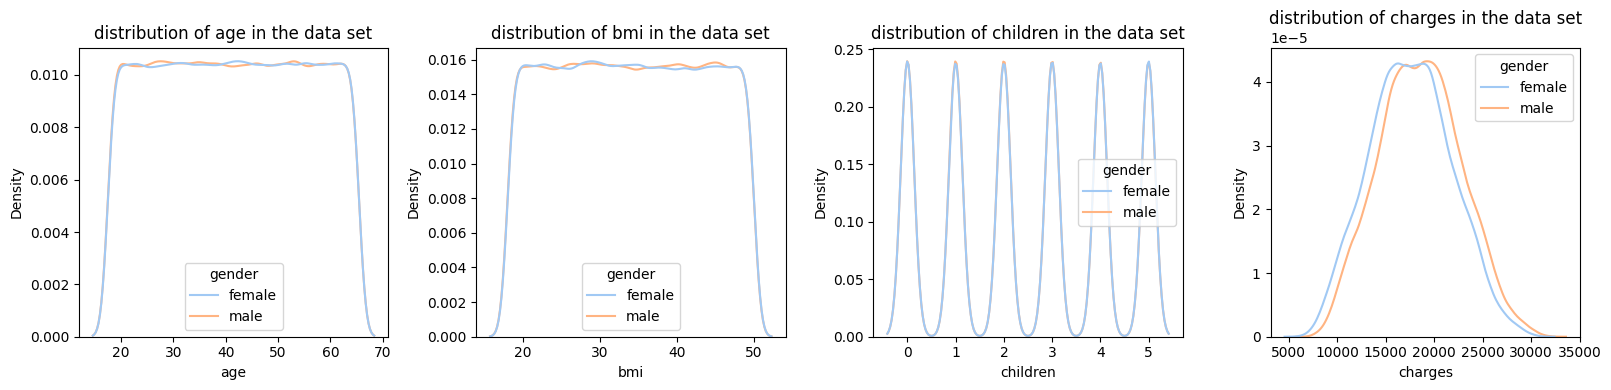

plot number coverage_level:  12%|█▎        | 1/8 [00:20<02:20, 20.01s/it]

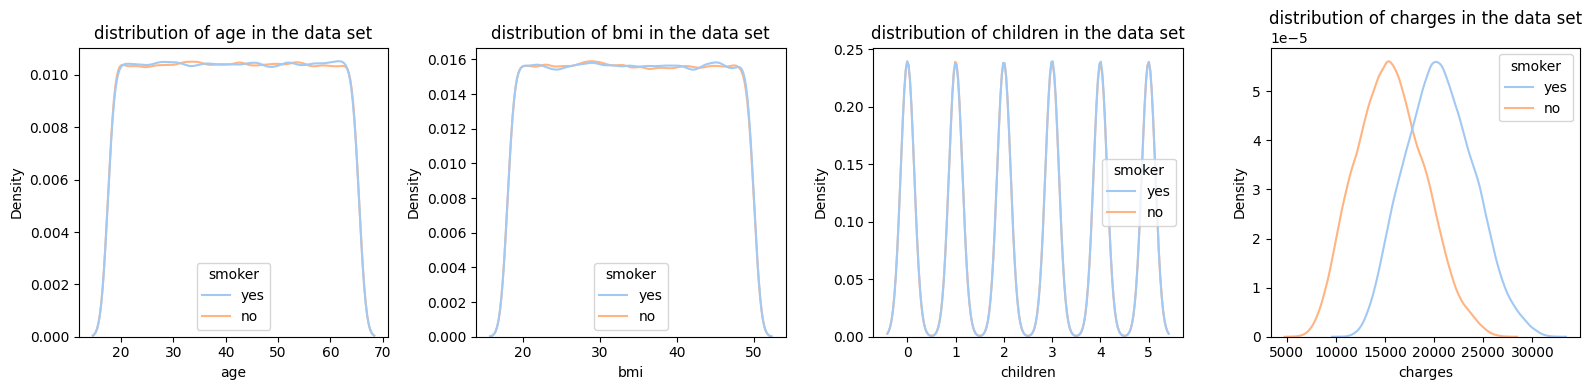

plot number coverage_level:  25%|██▌       | 2/8 [00:40<02:02, 20.38s/it]

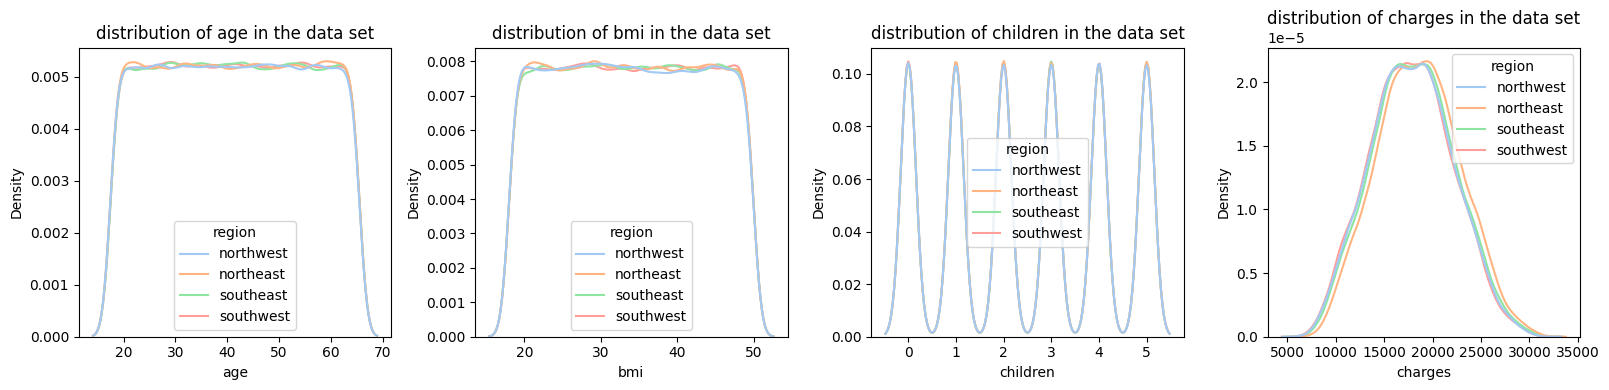

plot number coverage_level:  38%|███▊      | 3/8 [01:03<01:48, 21.61s/it]

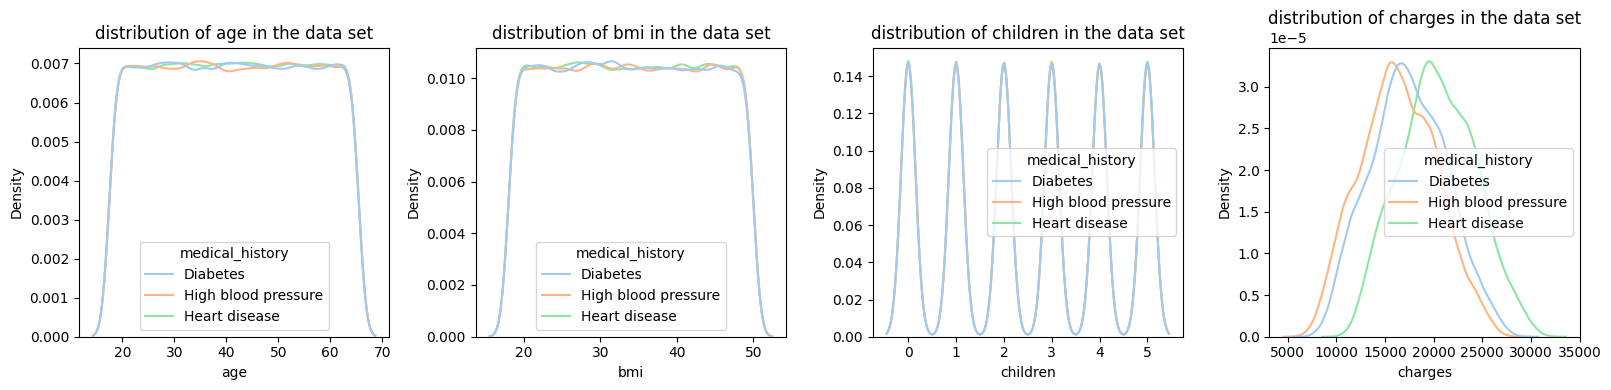

plot number coverage_level:  50%|█████     | 4/8 [01:26<01:28, 22.04s/it]

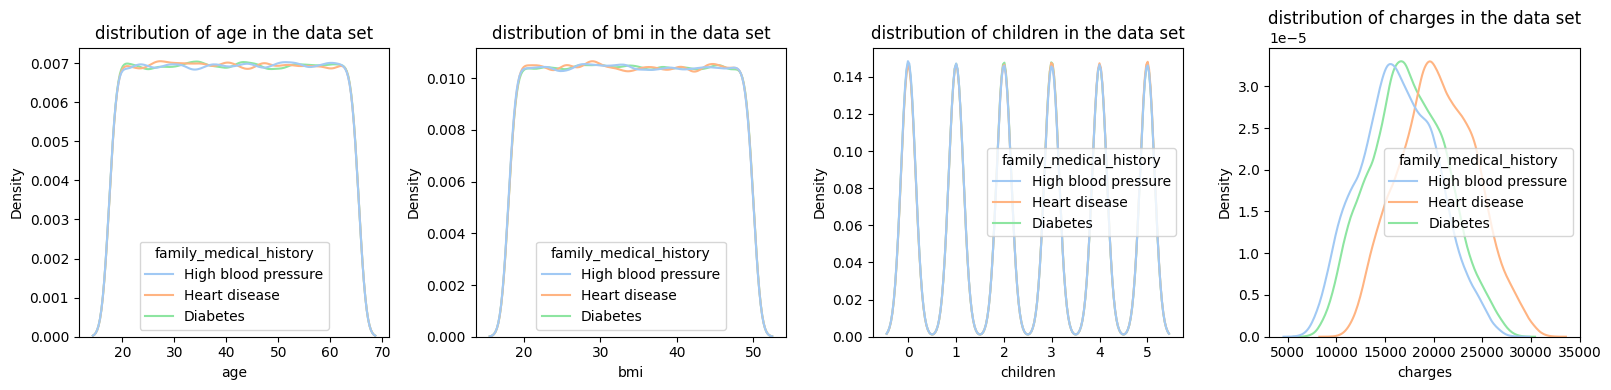

plot number coverage_level:  62%|██████▎   | 5/8 [01:48<01:05, 21.98s/it]

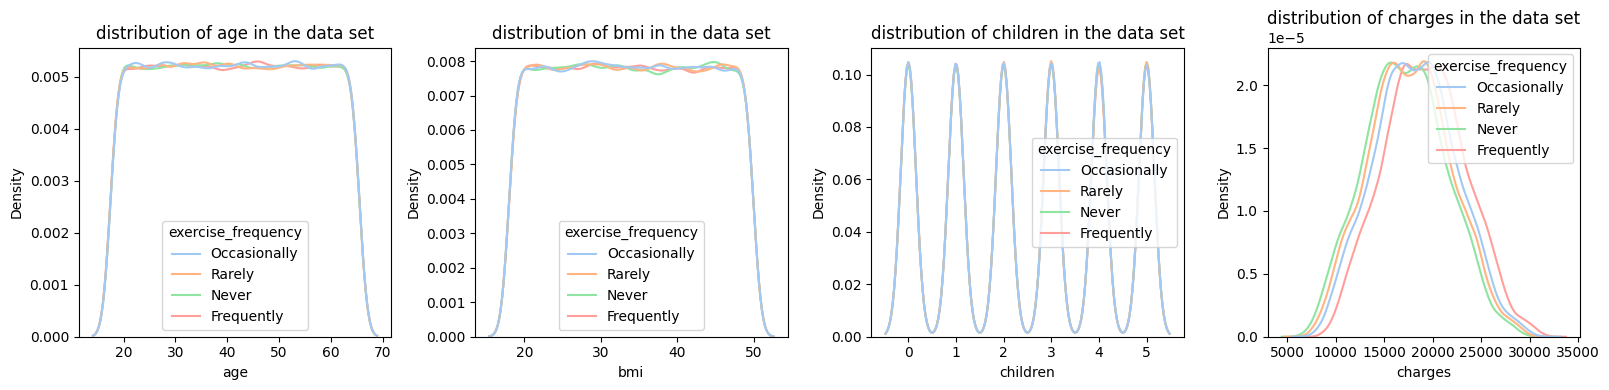

plot number coverage_level:  75%|███████▌  | 6/8 [02:10<00:44, 22.21s/it]

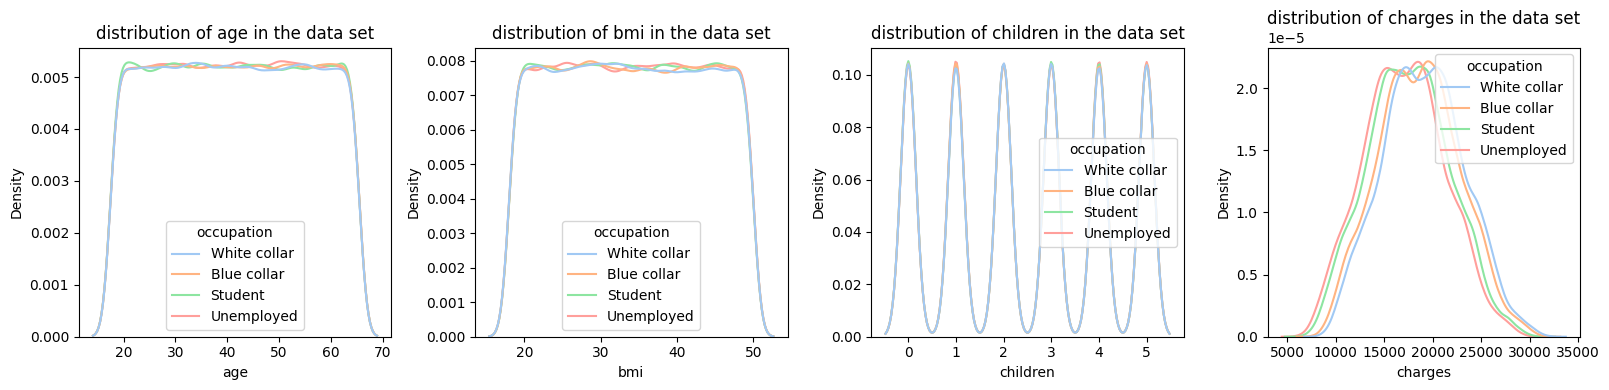

plot number coverage_level:  88%|████████▊ | 7/8 [02:32<00:21, 21.98s/it]

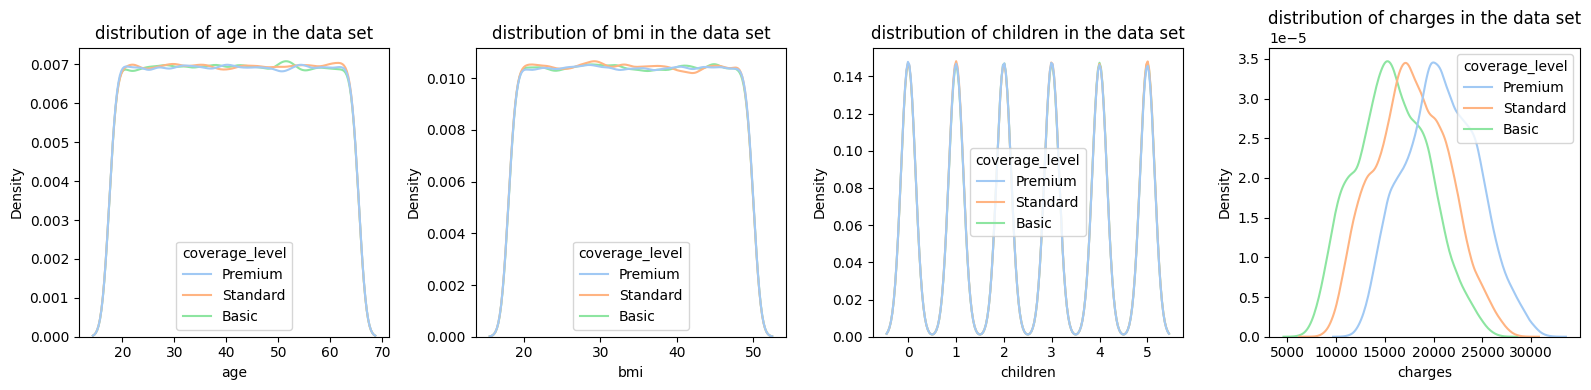

plot number coverage_level: 100%|██████████| 8/8 [02:53<00:00, 21.71s/it]


In [37]:
for col in tqdm(categ_col,desc=f'plot name  {col}'):
    plots(df, col)
    plt.show()

In [38]:
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region',
       'medical_history', 'family_medical_history', 'exercise_frequency',
       'occupation', 'coverage_level', 'charges'],
      dtype='object')

---
### **categrical factors that influences the insurance charge**
---

In [159]:
results = {}
for col in tqdm(categ_col):
    results[col] = df.groupby(col).agg(
        avg_charge=('charges', 'mean'),
        variation_charge=('charges', 'std')
    ).reset_index()


100%|██████████| 8/8 [00:00<00:00, 18.12it/s]


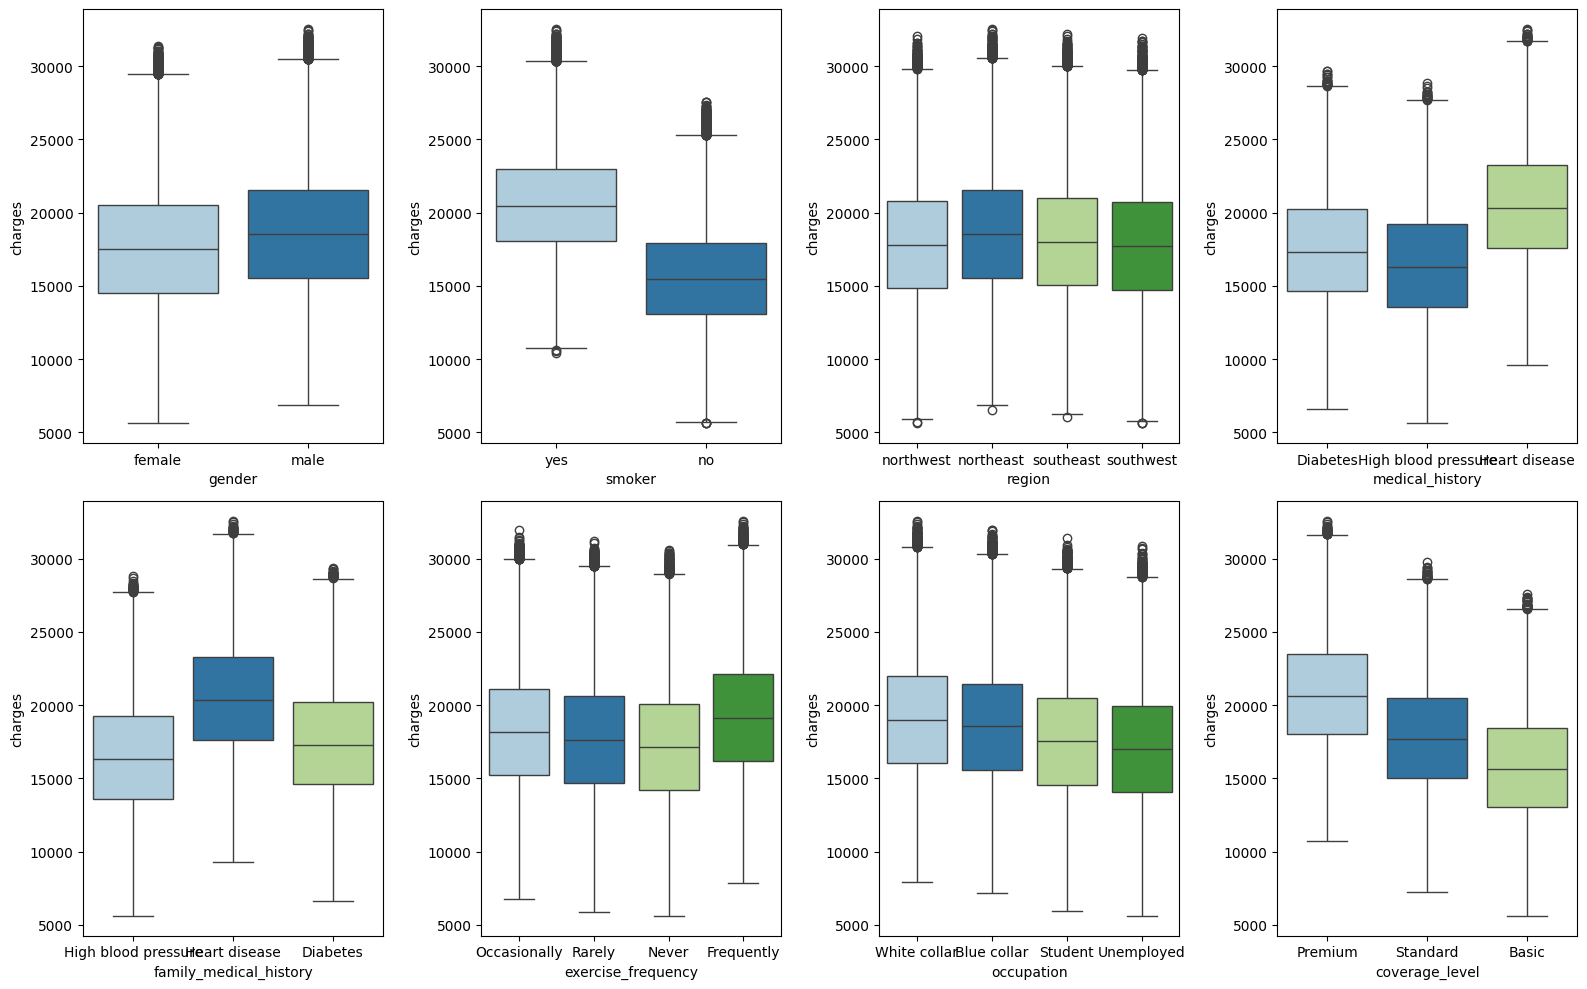

In [243]:
fig, ax = plt.subplots(2, 4, figsize=(16, 10))
ax = ax.flatten()
for i, col in enumerate(categ_col):
    sns.boxplot(df, x=col, y='charges', ax=ax[i],hue=col,palette='Paired')
plt.tight_layout() 

In [245]:
from scipy.stats import zscore

In [263]:
df['zscore'] = zscore(df['charges'])

In [264]:
df = df[df['zscore'] <= 3]

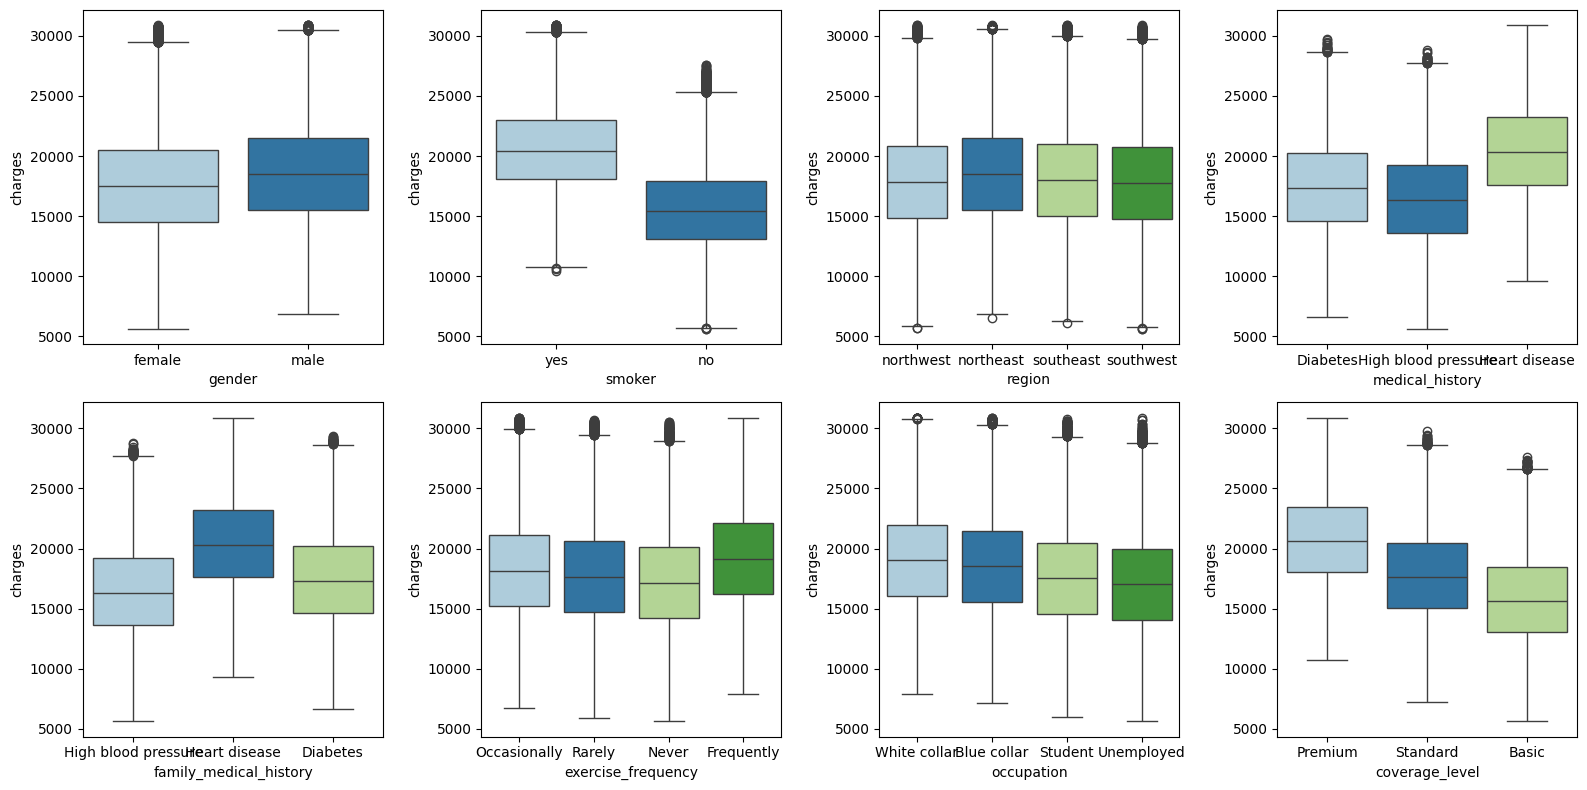

In [266]:
fig, ax = plt.subplots(2, 4, figsize=(16, 8))
ax = ax.flatten()
for i, col in enumerate(categ_col):
    sns.boxplot(df, x=col, y='charges', ax=ax[i],hue=col,palette='Paired')
plt.tight_layout() 

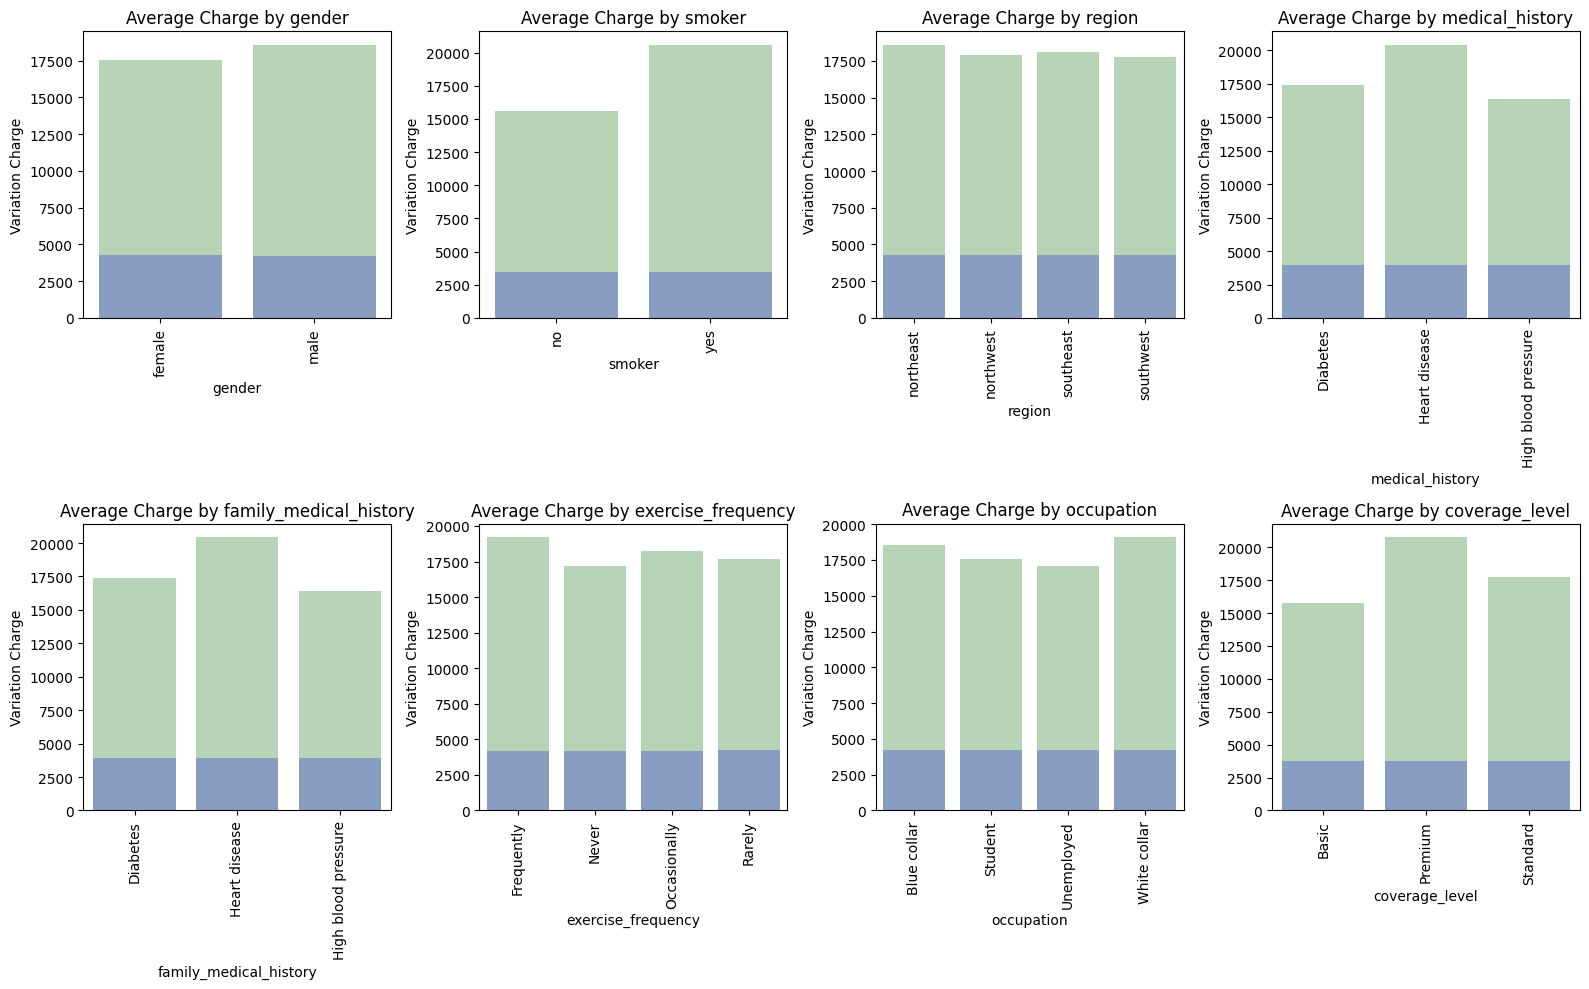

In [166]:
fig, ax = plt.subplots(2, 4, figsize=(16, 10))
ax = ax.flatten()
for i, col in enumerate(categ_col):
    g = results[col]
    sns.barplot(data=g, x=col, y=g.columns[1], ax=ax[i],color='green',alpha=0.3)
    ax[i].set_title(f'Average Charge by {col}')
    ax[i].set_ylabel('Average Charge')
    ax[i].set_xlabel(col)
    ax[i].tick_params(axis='x', rotation=90)
    sns.barplot(data=g, x=col, y=g.columns[2], ax=ax[i], color='blue', alpha=0.3)
    ax[i].set_ylabel('Variation Charge')
plt.tight_layout()
plt.show()


**Interpretation**:

**Categorical Features Influencing Insurance Charges:**
* **Smoking Status:**

* Smokers exhibit a significant increase in insurance charges, with a difference of approximately $5,000 compared to non-smokers.
This is due to the higher likelihood of medical conditions and the increased need for healthcare services associated with smoking.
* **Medical History:**

* Individuals with a medical history have considerably higher insurance charges than those without.
This reflects the increased risk and potential costs of managing chronic conditions or recurring health issues.
* **Exercise Frequency:**

* Interestingly, individuals who exercise frequently show the highest charges, which is counterintuitive.
While these individuals are generally healthier, the higher charges could be attributed to possible injuries from physical activities or higher health awareness leading to more preventive care costs.
* **Coverage Level**:

* Insurance charges vary significantly by the level of coverage:
Basic coverage: ~$1,550.
Standard coverage: ~$17,500.
Premium coverage: ~$20,000.
These differences align with the scope of services and benefits provided under each plan.
* **Location Features:**

* Geographical location appears to have no significant influence on insurance charges. This suggests that charges are standardized across regions, or location-based risks are not accounted for in the dataset.

* **Social Features:**

* Occupation has a minor influence on insurance charges:
Unemployed individuals tend to have the lowest charges.
White-collar workers incur the highest charges, likely due to their higher income and preference for more comprehensive coverage plans.

---
### **numerical factors that influences the insurance charge**
---

In [164]:
results_num = {}
for col in tqdm(num_col[:3]):
    results_num[col] = df.groupby(col)['charges'].mean().reset_index()
    

100%|██████████| 3/3 [00:00<00:00, 37.88it/s]


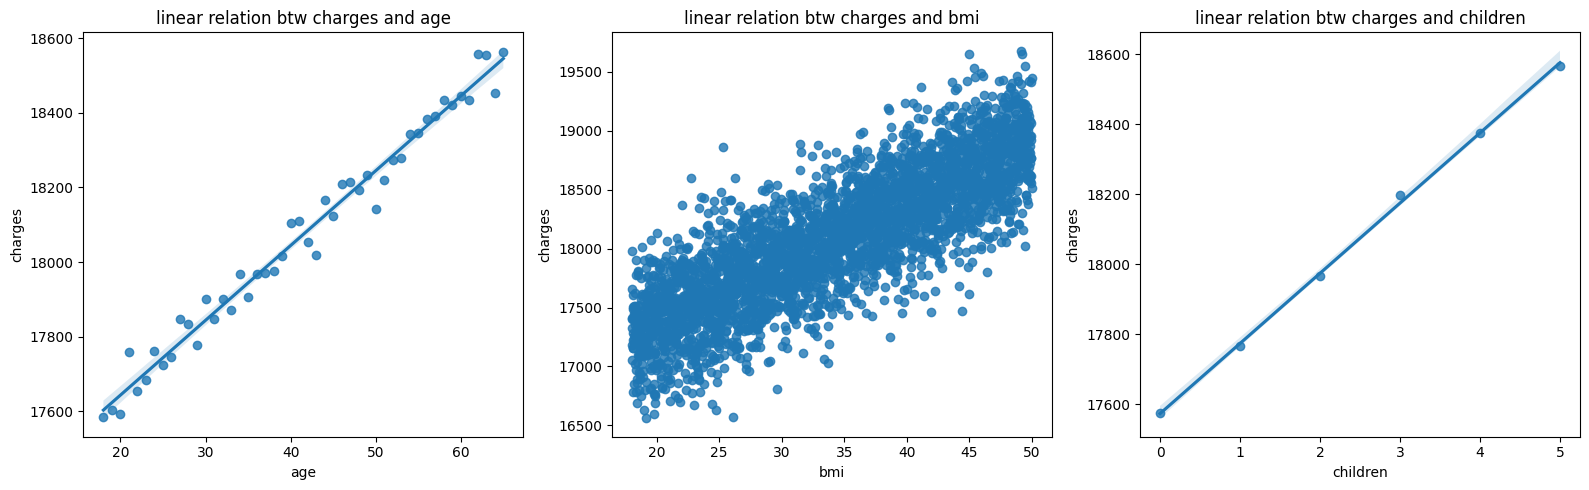

In [165]:
fig , ax = plt.subplots(1,3,figsize=(16,5))
ax=ax.flatten()
for i,col in enumerate(num_col[:3]):
    g = results_num[col]
    sns.regplot(g,x=col,y='charges',ax=ax[i])
    ax[i].set_title(f'linear relation btw charges and {col}')
plt.tight_layout()

**interpretation:**
* Age vs. Average Charges:
There is a positive linear relationship between the average charges and age. This implies that as clients grow older, their expenses tend to increase. This could be due to higher healthcare needs or risks associated with aging.

* Number of Children vs. Charges:
The data shows that the more children a client has, the higher their charges. This likely reflects increased healthcare needs for dependents or family-related expenses.

* BMI vs. Charges:
The Body Mass Index (BMI), which measures a client's health level based on weight and height, also influences charges. Higher BMI values might correlate with higher charges due to potential health risks associated with being overweight or obese.

---
## **Data preparation for Ml model**
---

In [174]:
categ_col =  [col for col in df.columns if df[col].dtype == 'object']
for i in categ_col:
    print(f'{i}')
    print('-'*50)
    print('unique values:',df[i].unique())
    print('_'*50)

gender
--------------------------------------------------
unique values: ['female' 'male']
__________________________________________________
smoker
--------------------------------------------------
unique values: ['yes' 'no']
__________________________________________________
region
--------------------------------------------------
unique values: ['northwest' 'northeast' 'southeast' 'southwest']
__________________________________________________
medical_history
--------------------------------------------------
unique values: ['Diabetes' 'High blood pressure' 'Heart disease']
__________________________________________________
family_medical_history
--------------------------------------------------
unique values: ['High blood pressure' 'Heart disease' 'Diabetes']
__________________________________________________
exercise_frequency
--------------------------------------------------
unique values: ['Occasionally' 'Rarely' 'Never' 'Frequently']
________________________________________

**encoding approch**
1. Binary Encoding for Features with Two Unique Values:
For categorical features that have only two unique values (like Smoker or Medical History), binary encoding is a natural choice. This will convert them into 0s and 1s, which makes them suitable for machine learning models.

2. Weight Encoding for Features with More Than Two Unique Values:
For categorical features with more than two unique values, like Coverage Level, you suggest grouping based on the insurance charge. The idea is to assign higher numerical values to categories associated with higher charges, which could represent the relative importance of each category in terms of cost. This is often referred to as weight encoding or mean encoding.

For example:

Coverage Level: ``['Basic', 'Standard', 'Premium']``
If 'Premium' has the highest average insurance charge, it gets the highest value (e.g., 2).
'Standard' would get a middle value (e.g., 1).
'Basic' would get the lowest value (e.g., 0).


In [183]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  OrdinalEncoder,StandardScaler,OneHotEncoder

In [272]:
medical_order = ['High blood pressure','Diabetes', 'Heart disease']
occupation_order = ['Unemployed','Student','Blue collar','White collar']
coverage_lvl_order = ['Standard','Basic','Premium']
execice_order = ['Never','Rarely','Occasionally','Frequently']


processor = ColumnTransformer(
    transformers=[
        ('age_scaler',StandardScaler(),['age']),
        ('bmi_scaler',StandardScaler(),['bmi']),
        ('charges_scaler',StandardScaler(),['charges']),
        ('children_passthrough', 'passthrough', ['children']),
        ('medical encoder',OrdinalEncoder(categories=[medical_order]),['medical_history']),
        ('exerice_encoder',OrdinalEncoder(categories=[execice_order]),['exercise_frequency']),
        ('occup_encoder',OrdinalEncoder(categories=[occupation_order] ),['occupation']),
        ('coverage_lvl_encoder',OrdinalEncoder(categories=[coverage_lvl_order]),['coverage_level']),
        ('gender_encoder',OneHotEncoder(drop='first'),['gender']),
        ('smocker_encoder',OneHotEncoder(drop='first'),['smoker']),



    ],
    remainder='drop')

processed_data = processor.fit_transform(df)
df_num = pd.DataFrame(
    processed_data,
    columns=['age_scaled', 'bmi_scaled', 'charges_scaled', 'children', 
             'medical_history_encoded', 'exercise_frequency_encoded', 
             'occupation_encoded', 'coverage_level_encoded','gender','smoker']
)


In [273]:
df_num.head()

,age_scaled,bmi_scaled,charges_scaled,children,medical_history_encoded,exercise_frequency_encoded,occupation_encoded,coverage_level_encoded,gender,smoker
0,-1.190030,-0.932024,0.543359,2.0,1.0,2.0,3.0,2.0,0.0,1.0
1,0.541895,0.457306,0.280501,3.0,1.0,1.0,3.0,0.0,1.0,1.0
2,1.624348,-1.501617,-1.991880,2.0,0.0,0.0,2.0,1.0,0.0,0.0
3,0.830549,-0.376509,-0.521011,4.0,2.0,1.0,1.0,0.0,1.0,0.0
4,0.253241,0.616488,-0.744194,1.0,0.0,2.0,2.0,2.0,0.0,0.0


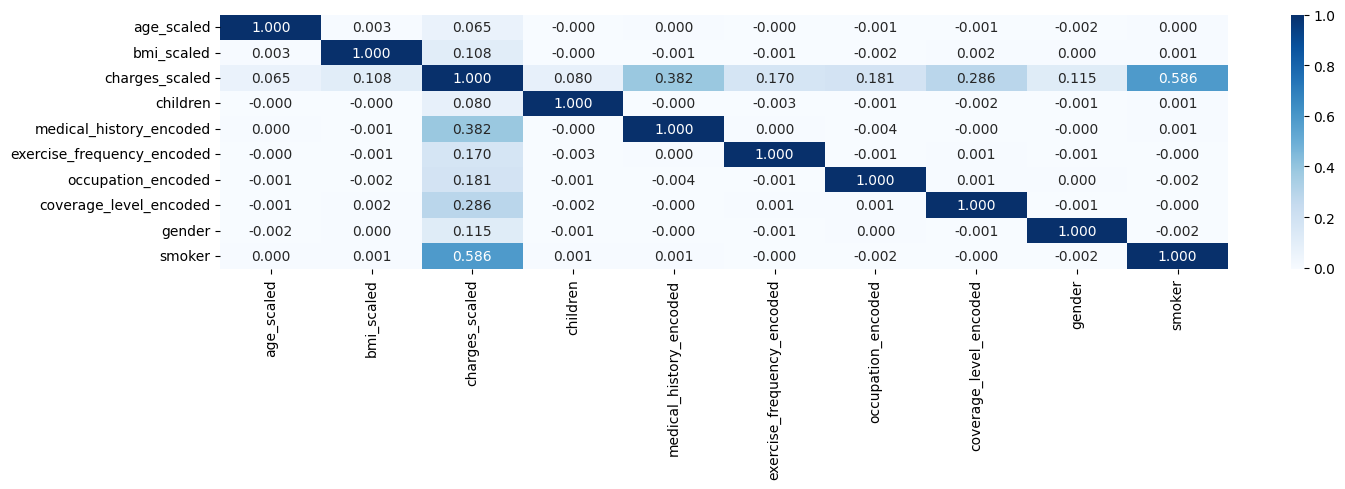

In [274]:
plt.figure(figsize=(15,5))
sns.heatmap(df_num.corr(),annot=True,fmt='.3f',cmap='Blues')
plt.tight_layout()

<Axes: >

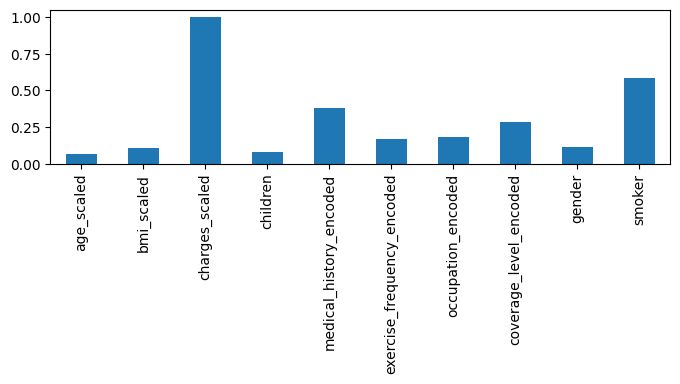

In [276]:
plt.figure(figsize=(8,2))
df_num.corrwith(df_num['charges_scaled']).plot(kind='bar')

---
### **building our model**
---

In [293]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import  RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error,mean_squared_error,r2_score

In [278]:
x,y=df_num.drop('charges_scaled',axis=1),df_num['charges_scaled']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

0.3792135754308629


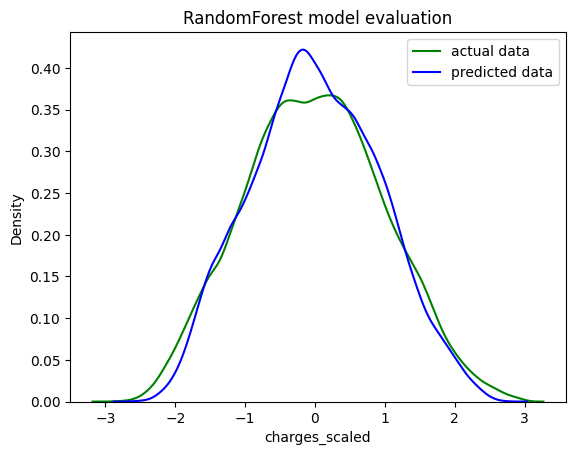

In [300]:

mdl = RandomForestRegressor(random_state=42)
mdl.fit(x_train,y_train)
y_hat=mdl.predict(x_test)
print(mean_absolute_error(y_test,y_hat))
ax = sns.kdeplot(x=y_test,label='actual data',color='green')
sns.kdeplot(x=y_hat,label='predicted data',color='blue')
plt.title('RandomForest model evaluation')
plt.legend(loc='best')
plt.show()

In [295]:
print('the mean absolute error :', mean_absolute_error(y_test,y_hat))
print('the model mse :',mean_squared_error(y_test,y_hat))
print('the model R_score :',r2_score(y_test,y_hat))

the mean absolute error : 0.3792135754308629
the model mse : 0.19388888430520307
the model R_score : 0.8059615442489929


In [308]:
from sklearn.metrics import make_scorer

In [311]:
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

cv_scores = cross_val_score(mdl, x_train, y_train, cv=5, scoring=mae_scorer)

# Print the results
print("MAE for each fold:", -cv_scores)
print('-')
print("Average MAE:", -cv_scores.mean())

  0%|          | 0/5 [14:36<?, ?it/s]

MAE for each fold: [0.37839847 0.38014239 0.37990783 0.38107657 0.37960863]
-
Average MAE: 0.3798267797850292


0.3792135754308629


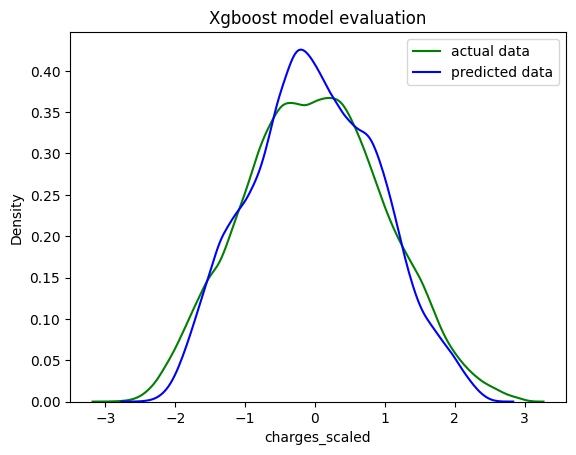

XGBRegressor evaluation
the mean absolute error : 0.3667504969650259
the model mse : 0.17018372271924073
the model R_score : 0.8296849926764321


In [301]:
Xgb = XGBRegressor(random_state=42)
Xgb.fit(x_train,y_train)
y_hat_2=Xgb.predict(x_test)
print(mean_absolute_error(y_test,y_hat))
ax = sns.kdeplot(x=y_test,label='actual data',color='green')
sns.kdeplot(x=y_hat_2,label='predicted data',color='blue')
plt.title('Xgboost model evaluation')
plt.legend(loc='best')
plt.show()
print('XGBRegressor evaluation')
print('the mean absolute error :', mean_absolute_error(y_test,y_hat_2))
print('the model mse :',mean_squared_error(y_test,y_hat_2))
print('the model R_score :',r2_score(y_test,y_hat_2))

# Model Performance Assessment


### 1. **Mean Absolute Error (MAE):** 0.3792

- **Definition**: The Mean Absolute Error (MAE) is the average magnitude of the errors between the predicted values and the actual values. It is expressed in the same units as the target variable.
- **Interpretation**: 
  - The model’s predictions deviate from the actual values by approximately **0.379** units on average.
  - A lower MAE suggests a better model performance. This is a relatively low value, indicating that the model's predictions are reasonably accurate and the error is acceptable in the context of the problem.
- **Next Steps**: 
  - If desired, compare this value with the range or variance of the target variable to assess whether this error is within an acceptable threshold.

### 2. **Mean Squared Error (MSE):** 0.1939

- **Definition**: The Mean Squared Error (MSE) is the average of the squared differences between the actual and predicted values. It penalizes larger errors more than MAE due to the squaring.
- **Interpretation**: 
  - The model’s MSE of **0.1939** indicates that the squared differences between predicted and actual values are relatively small.
  - Since MSE increases with larger errors, this low value suggests that the model has small prediction errors.
- **Next Steps**: 
  - To better understand the error distribution, we can calculate the **Root Mean Squared Error (RMSE)**, which is the square root of MSE and is in the same units as the target variable.
  - **RMSE** = \( \sqrt{0.1939} \approx 0.4404 \)

### 3. **R-squared (\( R^2 \))**: 0.8060

- **Definition**: The R-squared metric measures the proportion of variance in the target variable that is explained by the model. The value of \( R^2 \) ranges from 0 to 1.
  - \( R^2 = 1 \) indicates perfect prediction.
  - \( R^2 = 0 \) indicates the model explains none of the variance.
- **Interpretation**: 
  - With an \( R^2 \) of **0.8060**, the model explains **80.6%** of the variance in the target variable.
  - This is considered strong performance, showing that the model captures most of the underlying patterns in the data.
  - A higher \( R^2 \) value indicates better model fit and a more accurate prediction.

---

### **Summary of Model Performance:**

- **MAE:** 0.3792 — The model’s predictions are reasonably accurate on average.
- **MSE:** 0.1939 — The model shows small prediction errors, with penalties for large errors.
- **\( R^2 \):** 0.8060 — The model explains 80.6% of the variance in the target variable, indicating strong performance.

### **Conclusion:**
The model performs well with a relatively low error margin and a high level of explained variance. The results are robust, and the model fits the data quite effectively. However, further improvements could be made by exploring additional features, tuning hyperparameters, or trying different algorithms.

Would you like to explore how to further improve the model or visualize its performance?
